In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

## General parameters of the generator

Setting number of columns, noise level of data - values and label.

In [2]:
colNum = 4
rowsNum = 500
samples = np.ndarray((rowsNum,colNum+1))
colnames = ["x_{}".format(i+1) for i in range(colNum)] + ["y"]
samples = pd.DataFrame(samples,columns=colnames)

#generating coefitiens a_i
a_i = 2 * np.random.rand(colNum) -1

#generating value range for x_i
x_i_range = np.random.randint(1,200, size=colNum)
for i in range(colNum):
    samples.iloc[:,i] = np.linspace(-x_i_range[i], x_i_range[i],rowsNum)


#calculatning label y
temp = np.zeros(rowsNum)
for i in range(colNum):
    temp = temp + a_i[i] * samples.iloc[:,i].values
samples["y"] = temp

In [3]:
a_i

array([-0.52010433,  0.38474475,  0.99904154, -0.38302322])

In [4]:
#adding noise
#todo later
noiselevel = 0.02
samples_noise = samples.apply(lambda x : np.random.normal(loc=x,scale=abs(x*noiselevel)))
samples_noise




,x_1,x_2,x_3,x_4,y
0,-77.968413,-82.629139,-15.496568,-90.963389,31.417604
1,-81.546195,-81.020560,-14.476769,-96.381928,32.145089
2,-79.997533,-83.695176,-14.493022,-95.478868,31.258628
3,-77.102145,-81.838301,-15.002482,-93.703990,31.570893
4,-78.449631,-82.893335,-15.250881,-96.311999,31.174160
...,...,...,...,...,...
495,78.055944,78.106377,14.996470,95.225699,-31.136467
496,75.898878,84.423196,15.026562,92.210382,-30.808498
497,75.268190,82.911804,14.453894,92.693575,-31.284640
498,79.979159,82.732805,15.002118,94.361616,-31.724023


In [5]:
#generating data frame
samples_noise.to_csv("linear_reg_data.csv",index=False,sep=";",decimal=",")

In [6]:
(samples - samples_noise).mean()


x_1    0.005399
x_2   -0.000676
x_3    0.016173
x_4   -0.062938
y      0.001742
dtype: float64

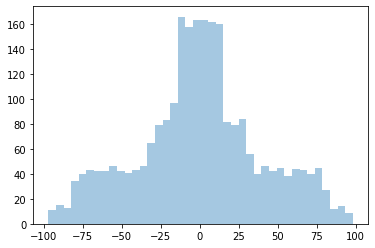

In [10]:
sns.distplot(samples_noise,kde=False, bins=40)